In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train_flat = x_train.reshape(x_train.shape[0], 28*28)
x_test_flat = x_test.reshape(x_test.shape[0], 28*28)


In [4]:
train_df = pd.DataFrame(x_train_flat)
train_df['label'] = y_train

NameError: name 'pd' is not defined

In [ ]:
train_df = train_df[['label'] + [col for col in train_df.columns if col != 'label']]


In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('mnist.csv')

In [15]:
data.drop(columns = [data.columns[0]], inplace= True)

In [16]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data = np.array(data)
m, n = data.shape
# np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [18]:
np.random.rand(10, 784) - 0.5

array([[-0.21691893, -0.25696959,  0.07947826, ..., -0.17058069,
         0.01077479, -0.28301285],
       [-0.4305997 ,  0.31214392,  0.01098209, ..., -0.48159923,
        -0.39819351,  0.28368819],
       [ 0.26967978,  0.45014627,  0.44333023, ..., -0.46046248,
        -0.15563943,  0.39791457],
       ...,
       [ 0.27472772,  0.25159598,  0.12423264, ...,  0.17479724,
        -0.06126925,  0.37815645],
       [ 0.23563571, -0.34386622, -0.05881579, ..., -0.35452673,
        -0.05689248,  0.42465634],
       [-0.16998145, -0.38378032,  0.49577114, ...,  0.40784472,
         0.27592426,  0.42548441]])

In [19]:
x_train.shape, y_train.shape

((784, 41000), (41000,))

In [20]:
def init_params(a,n_labels,x_size):
    w1 = np.random.randn(a,x_size) - 0.5
    b1 = np.random.randn(a,1) - 0.5
    
    
    
    w2 = np.random.randn(a,n_labels) - 0.5
    b2 = np.random.randn(n_labels,1) - 0.5
    
    return w1, b1, w2, b2

In [21]:
def init_param(n_hidden):
    hidden_cells_size = 10
    
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(hidden_cells_size, 10) - 0.5
    b2 = np.random.rand(hidden_cells_size, 1) - 0.5
        
    hidden_weights = np.array([W2 for i in range(n_hidden)])
    hidden_bias = np.array([b2 for i in range(n_hidden)])

    W3 = np.random.rand(10, hidden_cells_size) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, hidden_weights, hidden_bias, W3, b3

In [22]:
def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def deriv_leaky_relu(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

In [23]:
def relu(z):
    return np.maximum(z,0)

def softmax(Z):
#     shift_x = x - np.max(x)
#     exp_x = np.exp(shift_x)
#     a = exp_x / np.sum(exp_x)
#     return a
    A = np.exp(Z) / sum(np.exp(Z))
    return A


In [24]:
def for_prop(x, w1, b1, hidden_weights, hidden_bias, w3, b3):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    
    z2 = hidden_weights[0].dot(a1) + hidden_bias[0]
    a2 = relu(z2)
    
    hidden_z_list = np.array([z2 for i in range(len(hidden_bias))])
    hidden_a_list = np.array([a2 for i in range(len(hidden_bias))])
    
    for i in range(len(hidden_z_list)-1):
        hidden_z_list[i+1] = hidden_weights[i+1].dot(hidden_a_list[i]) + hidden_bias[1+1]
        hidden_a_list[i+1] = relu(hidden_z_list[i+1])
    
    z3 = w3.dot(hidden_a_list[-1]) + hidden_bias[-1]  # b3 is broadcast to match z3's shape
    a3 = softmax(z3)
    
    return z1, a1, hidden_z_list, hidden_a_list, z3, a3

In [25]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max()+1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [26]:
def deriv_relu(z):
    return z>0

In [27]:
W1, b1, hidden_weights, hidden_bias, W3, b3 = init_param(6)

In [28]:
z1, a1, hidden_z_list, hidden_a_list, z3, a3 = for_prop(x_train, W1, b1, hidden_weights, hidden_bias, W3, b3)

In [30]:
a3.shape

(10, 41000)

In [9]:
def back_prop(z1,a1,hidden_z_list,hidden_a_list,z3,a3,w1,hidden_weights,w3,x,y):
    one_hot_y = one_hot(y)

    dz3 = a3 - one_hot_y
    dw3 = 1/m * dz3.dot(hidden_a_list[-1].T)
    db3 = 1/m * np.sum(dz3)

    dz2 = W3.T.dot(dz3) * deriv_relu(hidden_z_list[-1])
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)

    hidden_dz = np.array([dz2 for i in range(len(hidden_z_list))])
    hidden_dw = np.array([dw2 for i in range(len(hidden_z_list))])
    hidden_db = np.array([db2 for i in range(len(hidden_z_list))])

    for i in range(1,len(hidden_z_list)):
        hidden_dz[-i] = hidden_weights[-i+1].T.dot(hidden_dz[-1+1]) * deriv_relu(hidden_z_list[-i])
        hidden_dw[-i] = 1/m * hidden_dz[-i].dot(hidden_a_list[-i-1].T)
        hidden_db[-i] = 1/m * np.sum(hidden_dz[-i])

    dz1 = hidden_weights[0].T.dot(hidden_dz[0]) * deriv_relu(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)
    
    return dw1, db1, hidden_dw, hidden_db, dw3, db3
    
    

In [10]:
dw1, db1, hidden_dw, hidden_db, dw3, db3 = back_prop(z1, a1, hidden_z_list, hidden_a_list, z3, a3, W1, hidden_weights, W3, x_train, y_train)

NameError: name 'z1' is not defined

In [18]:
def update_params(w1,b1,hidden_weights,hidden_bias,w3,b3,dw1, db1, hidden_dw, hidden_db, dw3, db3,lr):
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    for i in range(len(hidden_bias)):
        hidden_weights[i,:] = hidden_weights[i,:] - lr * hidden_dw[i]
        hidden_bias[i,:] = hidden_bias[i,:] - lr * hidden_db[i]
    
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3

    return w1, b1, hidden_weights, hidden_bias, w3, b3

In [19]:
def get_pred(a2):
    return np.argmax(a2,0)

def get_acc(pred,y):
    return np.sum(y == pred)/y.size

In [20]:
def grad_desc(x,y,hidden_layers,epochs,lr):
    x_size = x.shape[0]
    n_labels = np.unique(y).shape[0]
    a = 10
    
    
    w1, b1, hidden_weights, hidden_bias, w3, b3 = init_param(hidden_layers)
    
    for i in range(epochs):
        z1, a1, hidden_z_list, hidden_a_list, z3, a3 = for_prop(x, w1, b1, hidden_weights, hidden_bias, w3, b3)
        dw1, db1, hidden_dw, hidden_db, dw3, db3 = back_prop(z1, a1, hidden_z_list, hidden_a_list, z3, a3,w1,hidden_weights,w3,x,y)
        w1, b1, hidden_weights, hidden_bias, w3, b3 = update_params(w1, b1, hidden_weights, hidden_bias, w3, b3,dw1, db1, hidden_dw, hidden_db, dw3, db3,lr)
        
        print(f'Accuracy of {i}th iteration is {get_acc(get_pred(a3),y)}')
    
    return w1, b1, hidden_weights, hidden_bias, w3, b3
#     return x,get_pred(a2)

    

In [21]:
upd_W1, upd_b1, upd_hidden_weights, upd_hidden_bias, upd_W3, upd_b3 = grad_desc(x_train, y_train,6, 10, 0.01)

Accuracy of 0th iteration is 0.10848780487804878
Accuracy of 1th iteration is 0.10851219512195122
Accuracy of 2th iteration is 0.10848780487804878
Accuracy of 3th iteration is 0.10848780487804878
Accuracy of 4th iteration is 0.10848780487804878
Accuracy of 5th iteration is 0.1085609756097561
Accuracy of 6th iteration is 0.10836585365853658
Accuracy of 7th iteration is 0.1083170731707317
Accuracy of 8th iteration is 0.10814634146341463
Accuracy of 9th iteration is 0.10804878048780488


In [22]:
def make_predictions(x, w1, b1, w2, b2, w3, b3):
    _,_,_, _, _, A3 = for_prop(x, w1, b1, w2, b2, w3, b3)
    predictions = get_pred(A3)
    return predictions

In [23]:
def test_prediction(index, w1, b1, w2, b2, w3, b3):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2, w3, b3)
    label = y_train[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
    return prediction

Prediction:  [9]
Label:  3


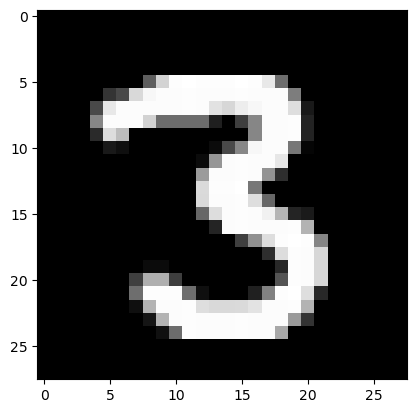

In [25]:
pred = test_prediction(np.random.randint(x_train.shape[1]), upd_W1, upd_b1, upd_hidden_weights, upd_hidden_bias, upd_W3, upd_b3)


Prediction:  [5]
Label:  4


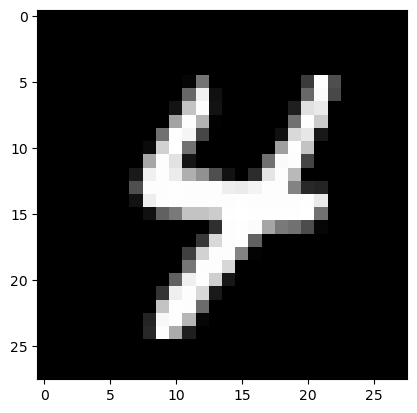

array([5], dtype=int64)

In [248]:
test_prediction(243, W1, b1, W2, b2, W3, b3)


In [ ]:
m,n = data.shape

In [ ]:
m,n

In [ ]:
get_acc